<a href="https://colab.research.google.com/github/renuka-ulusu/Heart_Disease_Risk_Prediction_Using_ML/blob/main/Heart_Disease_Risk_Prediction_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/heart_cleveland_upload.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
 print(data.shape)

(297, 14)


In [ ]:
data['condition'].value_counts()

,count
condition,
0,160
1,137


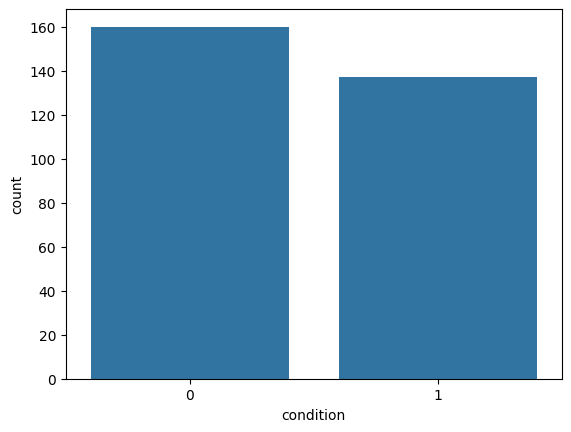

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='condition', data=data)
plt.show()

In [ ]:
x=pd.DataFrame(data.iloc[:,:-1])
y=pd.DataFrame(data.iloc[:,-1])

In [ ]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0


In [ ]:
y.head()

,condition
0,0
1,0
2,0
3,1
4,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=logmodel.predict(x_test)

In [ ]:
print("ACCURACY SCORE")
accuracy_score=accuracy_score(y_test,y_pred)
print(accuracy_score)

ACCURACY SCORE
0.85


In [ ]:
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[27,  1],
       [ 8, 24]])

In [ ]:
(27+24)/(27+1+8+24)

0.85

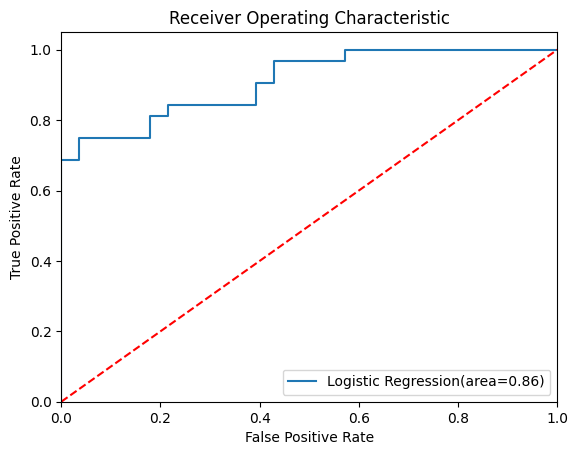

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc=roc_auc_score(y_test,y_pred)
fpr,tpr,threshold=roc_curve(y_test,logmodel.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

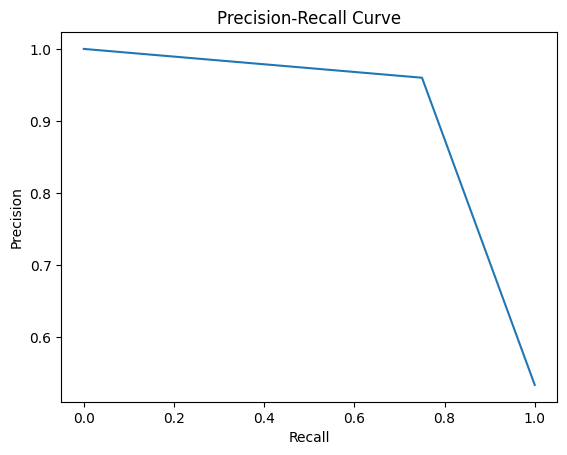

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.8421052631578947

In [ ]:
logloss=logmodel.predict_proba(x_test)
logloss

array([[0.13630593, 0.86369407],
       [0.85369282, 0.14630718],
       [0.00761443, 0.99238557],
       [0.68818084, 0.31181916],
       [0.31256872, 0.68743128],
       [0.95420088, 0.04579912],
       [0.00822759, 0.99177241],
       [0.427975  , 0.572025  ],
       [0.12887652, 0.87112348],
       [0.94746839, 0.05253161],
       [0.98354143, 0.01645857],
       [0.04671417, 0.95328583],
       [0.8854489 , 0.1145511 ],
       [0.04018903, 0.95981097],
       [0.83698595, 0.16301405],
       [0.03659497, 0.96340503],
       [0.03000567, 0.96999433],
       [0.94107581, 0.05892419],
       [0.16850841, 0.83149159],
       [0.62482117, 0.37517883],
       [0.94615594, 0.05384406],
       [0.94153292, 0.05846708],
       [0.96325671, 0.03674329],
       [0.01265353, 0.98734647],
       [0.95804822, 0.04195178],
       [0.96977344, 0.03022656],
       [0.07958074, 0.92041926],
       [0.57417248, 0.42582752],
       [0.93570997, 0.06429003],
       [0.01465817, 0.98534183],
       [0.

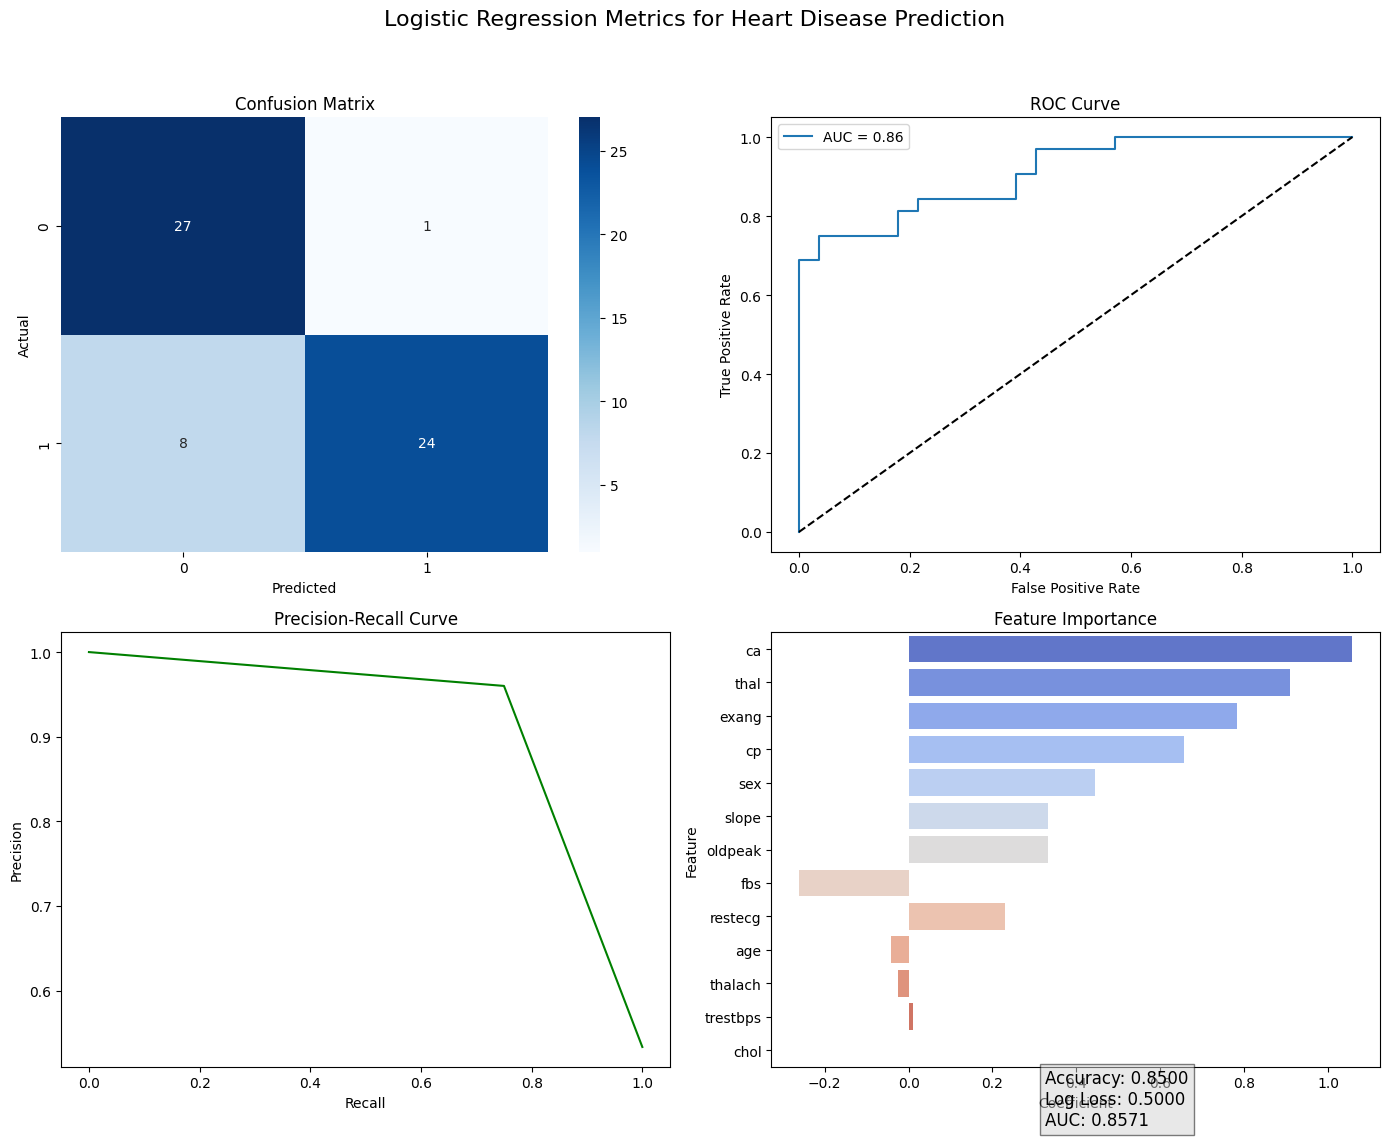

In [ ]:
import seaborn as sns
fig, axs = plt.subplots(2,2, figsize=(14, 12))
fig.suptitle("Logistic Regression Metrics for Heart Disease Prediction", fontsize=16)

# 1. Confusion Matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=axs[0, 0])
axs[0, 0].set_title("Confusion Matrix")
axs[0, 0].set_xlabel("Predicted")
axs[0, 0].set_ylabel("Actual")

# 2. ROC Curve
axs[0, 1].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
axs[0, 1].plot([0, 1], [0, 1], 'k--')
axs[0, 1].set_title("ROC Curve")
axs[0, 1].set_xlabel("False Positive Rate")
axs[0, 1].set_ylabel("True Positive Rate")
axs[0, 1].legend()

# 3. Precision-Recall Curve
axs[1, 0].plot(recall, precision, color='green')
axs[1, 0].set_title("Precision-Recall Curve")
axs[1, 0].set_xlabel("Recall")
axs[1, 0].set_ylabel("Precision")

coef_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': logmodel.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)
# 4. Feature Importance
sns.barplot(x='Coefficient', y='Feature', data=coef_df, ax=axs[1, 1], palette='coolwarm')
axs[1, 1].set_title("Feature Importance")

# Display extra metrics in text box
textstr = f"Accuracy: {accuracy_score:.4f}\nLog Loss: {logloss.mean():.4f}\nAUC: {roc_auc:.4f}"
plt.gcf().text(0.75, 0.05, textstr, fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()